# Library

In [1]:
import sys
sys.path.append('../../Util')
import PreProcessingUtils as ppu
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
PATH = "../../Datasets/"

In [7]:
df = pd.read_csv(f"{PATH}RawData/posts.zip")
df

,id,site_id,board_id,thread_id,creator,creator_id,creator_n_posts,creator_reputation,content,quoted_post_ids,...,created_on,updated_on,db_created_on,db_updated_on,codes,creator_n_likes,creator_n_threads,creator_n_vouches,creator_n_credits,attachment_url
0,36720469,1019,231,325823490,Spongebob18,97,0,0,[removed],{},...,2019-04-23 18:16:00,2019-04-23 18:16:00,2019-08-06 18:06:40.859515,2019-08-06 18:06:40.859515,NaN,NaN,NaN,NaN,NaN,NaN
1,24032363,1019,18,267995034,jayandsilentbob,16521,0,0,Sent to PM,{},...,2019-05-08 19:25:00,2019-05-08 19:25:00,2019-08-08 10:51:08.113685,2019-08-08 10:51:08.113685,NaN,NaN,NaN,NaN,NaN,NaN
2,24019342,1019,18,274398115,fdsm,6451,0,0,why in the actual fuck would you want fent?,{},...,2019-05-03 23:19:00,2019-05-03 23:19:00,2019-08-08 11:31:45.437428,2019-08-08 11:31:45.437428,NaN,NaN,NaN,NaN,NaN,NaN
3,103044339,1019,18,1007020202,empiremarketlinkdotnet,28892,0,0,[removed],{},...,2019-07-27 17:43:00,2019-07-27 17:43:00,2019-08-08 10:02:51.241563,2019-08-08 10:02:51.241563,NaN,NaN,NaN,NaN,NaN,NaN
4,26711942,1019,231,26711942,Subaru420,3501,0,0,(Suggestion) Add the filter to hide inactive l...,{},...,2019-08-06 16:43:33.188847,2019-08-06 16:43:33.188847,2019-08-06 16:43:33.323708,2019-08-06 16:43:33.323708,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294591,1156421769,1019,80,454710885,BigBird1 Pelican,12161,0,0,Trying to find out why we are banned right now...,{},...,2019-08-04 23:48:00,2019-08-04 23:48:00,2019-08-06 15:38:52.766424,2019-08-06 15:38:52.766424,NaN,NaN,NaN,NaN,NaN,NaN
294592,1859088030,1019,10,161610195,HumboldtGrowersPR,631,0,0,So let me get this straight... You believe HG ...,{},...,2018-11-15 15:44:00,2018-11-15 15:44:00,2019-08-07 16:54:59.138025,2019-08-07 16:54:59.138025,NaN,NaN,NaN,NaN,NaN,NaN
294593,540386492,1019,2,540386492,QuickTrot,9722,0,0,**Vendor Review**\n\n* `Vendor` - *Pearl*\n\n*...,{},...,2019-08-08 03:56:45.995964,2019-08-08 03:56:45.995964,2019-08-08 03:56:46.119398,2019-08-08 03:56:46.119398,NaN,NaN,NaN,NaN,NaN,NaN
294594,1332512359,1019,2,512278408,drkoalaman,806,0,0,You are delusional as fuck.\n\nYou were banned...,{},...,2018-07-08 12:27:00,2018-07-08 12:27:00,2019-08-08 04:05:51.125012,2019-08-08 04:05:51.125012,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294596 entries, 0 to 294595
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  294596 non-null  int64  
 1   site_id             294596 non-null  int64  
 2   board_id            294596 non-null  int64  
 3   thread_id           294596 non-null  int64  
 4   creator             294596 non-null  object 
 5   creator_id          294596 non-null  int64  
 6   creator_n_posts     294596 non-null  int64  
 7   creator_reputation  294596 non-null  int64  
 8   content             294592 non-null  object 
 9   quoted_post_ids     294596 non-null  object 
 10  is_initial_post     294596 non-null  object 
 11  created_on          294596 non-null  object 
 12  updated_on          294596 non-null  object 
 13  db_created_on       294596 non-null  object 
 14  db_updated_on       294596 non-null  object 
 15  codes               0 non-null    

In [5]:
df.drop(columns=['site_id', 'codes', 'creator_n_likes', 'creator_n_threads', 'creator_n_vouches', 'creator_n_credits', 'attachment_url'], inplace=True)

In [6]:
df.describe()

,id,board_id,thread_id,creator_id,creator_n_posts,creator_reputation
count,2.945960e+05,294596.000000,2.945960e+05,294596.000000,294596.0,294596.0
mean,1.072838e+09,53.065266,1.075806e+09,13890.286175,0.0,0.0
std,6.196729e+08,91.042142,6.155466e+08,13245.626335,0.0,0.0
min,1.708000e+04,1.000000,3.372500e+04,1.000000,0.0,0.0
25%,5.356949e+08,5.000000,5.459303e+08,2389.000000,0.0,0.0
50%,1.073613e+09,18.000000,1.083728e+09,9099.000000,0.0,0.0
75%,1.608567e+09,42.000000,1.601679e+09,22859.000000,0.0,0.0
max,2.147483e+09,446.000000,2.147418e+09,47532.000000,0.0,0.0


In [7]:
df.describe(include='object')

,creator,content,quoted_post_ids,is_initial_post,created_on,updated_on,db_created_on,db_updated_on
count,294596,294592,294596,294596,294596,294596,294596,294596
unique,42683,270239,1,2,251949,251949,294595,294595
top,[deleted],[removed],{},f,2018-03-24 21:00:00,2018-03-24 21:00:00,2019-08-08 01:03:54.690351,2019-08-08 01:03:54.690351
freq,4536,14155,294596,220498,18,18,2,2


In [8]:
df.nunique()

id                    294596
board_id                 382
thread_id              74098
creator                42683
creator_id             43629
creator_n_posts            1
creator_reputation         1
content               270239
quoted_post_ids            1
is_initial_post            2
created_on            251949
updated_on            251949
db_created_on         294595
db_updated_on         294595
dtype: int64

In [9]:
df['creator_n_posts'].value_counts()

creator_n_posts
0    294596
Name: count, dtype: int64

In [10]:
df['creator_reputation'].value_counts()

creator_reputation
0    294596
Name: count, dtype: int64

In [11]:
df['quoted_post_ids'].value_counts()

quoted_post_ids
{}    294596
Name: count, dtype: int64

In [12]:
df['is_initial_post'].value_counts()

is_initial_post
f    220498
t     74098
Name: count, dtype: int64

In [13]:
df.isnull().sum()

id                    0
board_id              0
thread_id             0
creator               0
creator_id            0
creator_n_posts       0
creator_reputation    0
content               4
quoted_post_ids       0
is_initial_post       0
created_on            0
updated_on            0
db_created_on         0
db_updated_on         0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df[(df['db_created_on'] == df['db_updated_on'])][['db_created_on', 'db_updated_on', 'created_on']]

,db_created_on,db_updated_on,created_on
0,2019-08-06 18:06:40.859515,2019-08-06 18:06:40.859515,2019-04-23 18:16:00
1,2019-08-08 10:51:08.113685,2019-08-08 10:51:08.113685,2019-05-08 19:25:00
2,2019-08-08 11:31:45.437428,2019-08-08 11:31:45.437428,2019-05-03 23:19:00
3,2019-08-08 10:02:51.241563,2019-08-08 10:02:51.241563,2019-07-27 17:43:00
4,2019-08-06 16:43:33.323708,2019-08-06 16:43:33.323708,2019-08-06 16:43:33.188847
...,...,...,...
294591,2019-08-06 15:38:52.766424,2019-08-06 15:38:52.766424,2019-08-04 23:48:00
294592,2019-08-07 16:54:59.138025,2019-08-07 16:54:59.138025,2018-11-15 15:44:00
294593,2019-08-08 03:56:46.119398,2019-08-08 03:56:46.119398,2019-08-08 03:56:45.995964
294594,2019-08-08 04:05:51.125012,2019-08-08 04:05:51.125012,2018-07-08 12:27:00


In [16]:
df.drop(columns=['is_initial_post', 'quoted_post_ids', 'creator_reputation', 'creator_n_posts', 'db_created_on', 'db_updated_on'], inplace=True)

In [17]:
df.head()

,id,board_id,thread_id,creator,creator_id,content,created_on,updated_on
0,36720469,231,325823490,Spongebob18,97,[removed],2019-04-23 18:16:00,2019-04-23 18:16:00
1,24032363,18,267995034,jayandsilentbob,16521,Sent to PM,2019-05-08 19:25:00,2019-05-08 19:25:00
2,24019342,18,274398115,fdsm,6451,why in the actual fuck would you want fent?,2019-05-03 23:19:00,2019-05-03 23:19:00
3,103044339,18,1007020202,empiremarketlinkdotnet,28892,[removed],2019-07-27 17:43:00,2019-07-27 17:43:00
4,26711942,231,26711942,Subaru420,3501,(Suggestion) Add the filter to hide inactive l...,2019-08-06 16:43:33.188847,2019-08-06 16:43:33.188847


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294596 entries, 0 to 294595
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          294596 non-null  int64 
 1   board_id    294596 non-null  int64 
 2   thread_id   294596 non-null  int64 
 3   creator     294596 non-null  object
 4   creator_id  294596 non-null  int64 
 5   content     294592 non-null  object
 6   created_on  294596 non-null  object
 7   updated_on  294596 non-null  object
dtypes: int64(4), object(4)
memory usage: 18.0+ MB


# Data Wrangling

## Created_on & updated_on

In [19]:
df.shape

(294596, 8)

In [20]:
df[(df['created_on'] == df['updated_on'])][['created_on', 'updated_on']]

,created_on,updated_on
0,2019-04-23 18:16:00,2019-04-23 18:16:00
1,2019-05-08 19:25:00,2019-05-08 19:25:00
2,2019-05-03 23:19:00,2019-05-03 23:19:00
3,2019-07-27 17:43:00,2019-07-27 17:43:00
4,2019-08-06 16:43:33.188847,2019-08-06 16:43:33.188847
...,...,...
294591,2019-08-04 23:48:00,2019-08-04 23:48:00
294592,2018-11-15 15:44:00,2018-11-15 15:44:00
294593,2019-08-08 03:56:45.995964,2019-08-08 03:56:45.995964
294594,2018-07-08 12:27:00,2018-07-08 12:27:00


In [21]:
df.drop(columns=['updated_on'], inplace=True)

In [22]:
df['created_on'].value_counts(dropna=False)

created_on
2018-03-24 21:00:00           18
2019-05-08 18:56:00           10
2019-05-06 23:51:00            9
2019-05-06 21:33:00            9
2019-05-08 18:06:00            8
                              ..
2019-08-06 10:28:49.413603     1
2019-08-08 01:21:40.805566     1
2019-08-08 13:12:31.88519      1
2019-08-07 18:17:54.555916     1
2019-08-08 04:32:54.231525     1
Name: count, Length: 251949, dtype: int64

In [23]:
df['created_on'] = df['created_on'].apply(ppu.convert_millisecond_date)
df['created_on'] = df['created_on'].dt.strftime('%Y-%m-%d')

In [24]:
df['created_on'].value_counts(dropna=False)

created_on
2019-08-08    26858
2019-08-07    14427
2019-08-06    13848
2019-12-31     3682
2020-01-08     3213
              ...  
2019-11-10       10
2018-05-28        9
2019-06-26        2
2019-05-19        1
2019-11-25        1
Name: count, Length: 629, dtype: int64

In [25]:
df.to_csv(f"{PATH}CleanedData/posts_cleaned.zip", index=False)

In [26]:
ppu.extract_date_features(df, 'created_on')

,id,board_id,thread_id,creator,creator_id,content,created_on,created_on_year,created_on_month,created_on_day,created_on_dayofweek,created_on_is_weekend
0,36720469,231,325823490,Spongebob18,97,[removed],2019-04-23,2019,4,23,1,0
1,24032363,18,267995034,jayandsilentbob,16521,Sent to PM,2019-05-08,2019,5,8,2,0
2,24019342,18,274398115,fdsm,6451,why in the actual fuck would you want fent?,2019-05-03,2019,5,3,4,0
3,103044339,18,1007020202,empiremarketlinkdotnet,28892,[removed],2019-07-27,2019,7,27,5,1
4,26711942,231,26711942,Subaru420,3501,(Suggestion) Add the filter to hide inactive l...,2019-08-06,2019,8,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294591,1156421769,80,454710885,BigBird1 Pelican,12161,Trying to find out why we are banned right now...,2019-08-04,2019,8,4,6,1
294592,1859088030,10,161610195,HumboldtGrowersPR,631,So let me get this straight... You believe HG ...,2018-11-15,2018,11,15,3,0
294593,540386492,2,540386492,QuickTrot,9722,**Vendor Review**\n\n* `Vendor` - *Pearl*\n\n*...,2019-08-08,2019,8,8,3,0
294594,1332512359,2,512278408,drkoalaman,806,You are delusional as fuck.\n\nYou were banned...,2018-07-08,2018,7,8,6,1


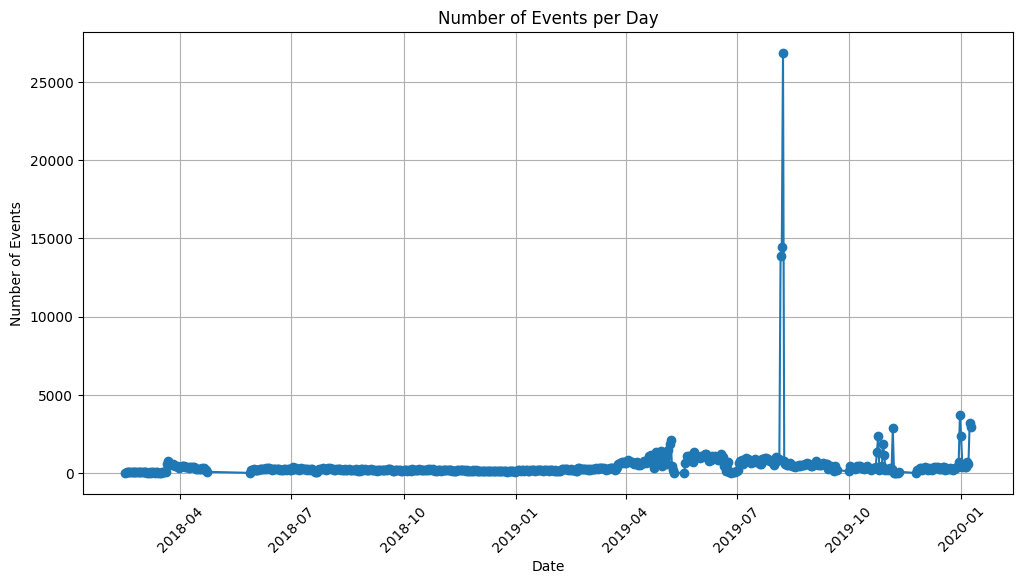

In [27]:
daily_counts = df.groupby(df['created_on'].dt.date).size()

plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')
plt.title('Number of Events per Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

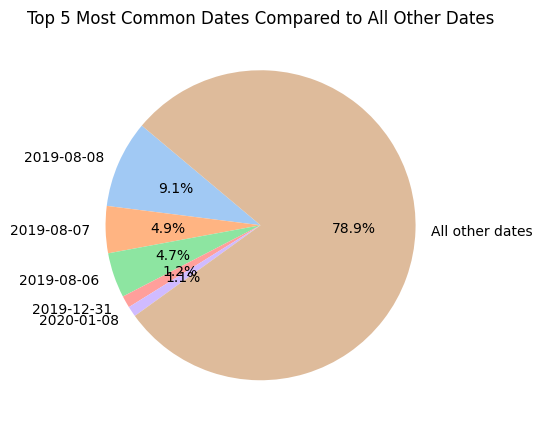

In [39]:
top_5_dates = df['created_on'].value_counts().nlargest(5)
top_5_counts = top_5_dates.values
top_5_labels = top_5_dates.index.date
other_count = len(df) - top_5_counts.sum()

labels = [f'{date}' for date in top_5_labels] + ['All other dates']
sizes = list(top_5_counts) + [other_count]
colors = sns.color_palette('pastel', len(sizes))
explode = [0.1] * len(top_5_labels) + [0]

plt.figure(figsize=(5, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Most Common Dates Compared to All Other Dates')
plt.show();

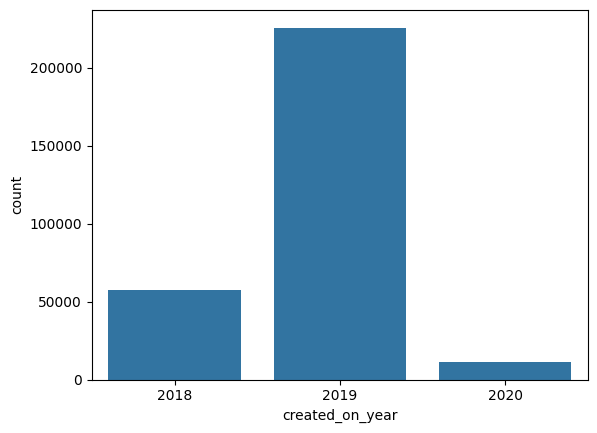

In [29]:
sns.countplot(x='created_on_year', data=df);

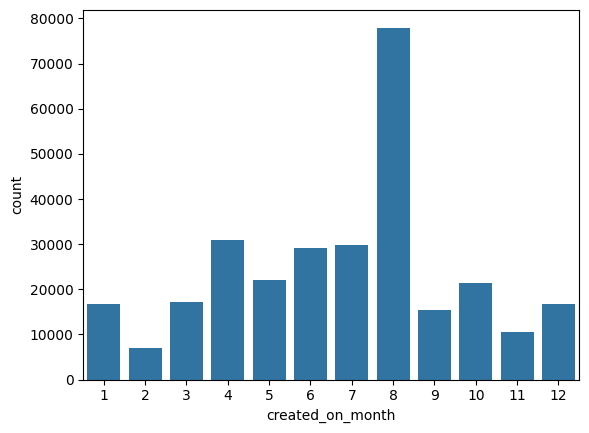

In [30]:
sns.countplot(x='created_on_month', data=df);

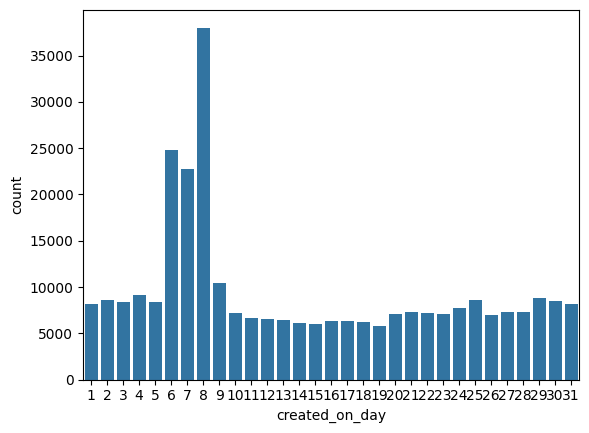

In [31]:
sns.countplot(x='created_on_day', data=df);

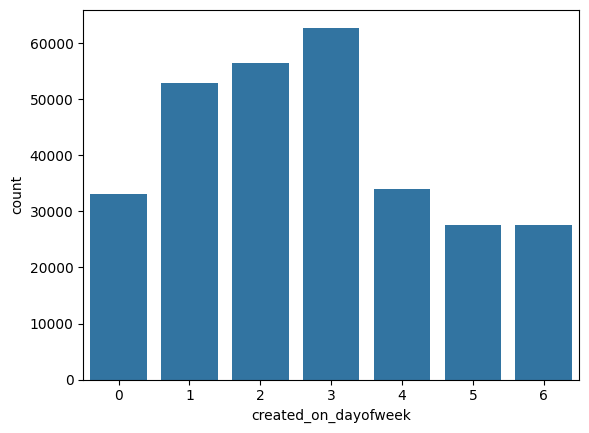

In [32]:
sns.countplot(x='created_on_dayofweek', data=df);

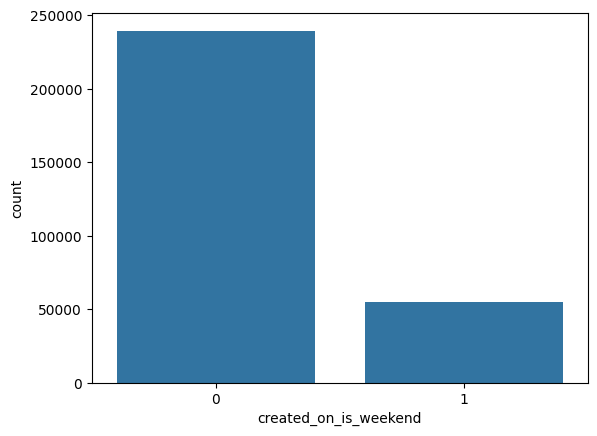

In [33]:
sns.countplot(x='created_on_is_weekend', data=df);

### Plot Figure

<Figure size 1000x500 with 0 Axes>

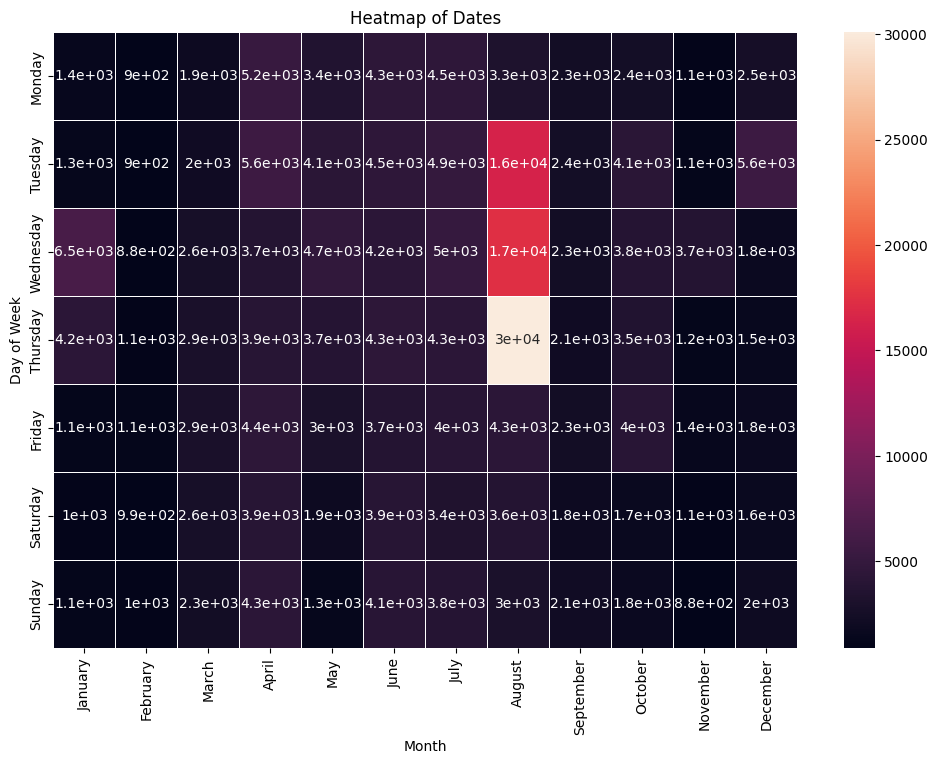

In [34]:
plt.figure(figsize=(10, 5))
heatmap_data = df.pivot_table(index='created_on_dayofweek', columns='created_on_month', aggfunc='size', fill_value=0)
heatmap_data
days_order = [0, 1, 2, 3, 4, 5, 6]
heatmap_data = heatmap_data.reindex(days_order)
months_order = list(range(1, 13))
heatmap_data = heatmap_data[months_order]

heatmap_data.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cbar=True, linewidth=.5)
plt.title('Heatmap of Dates')
plt.xlabel('Month')
plt.ylabel('Day of Week');

<Figure size 1000x500 with 0 Axes>

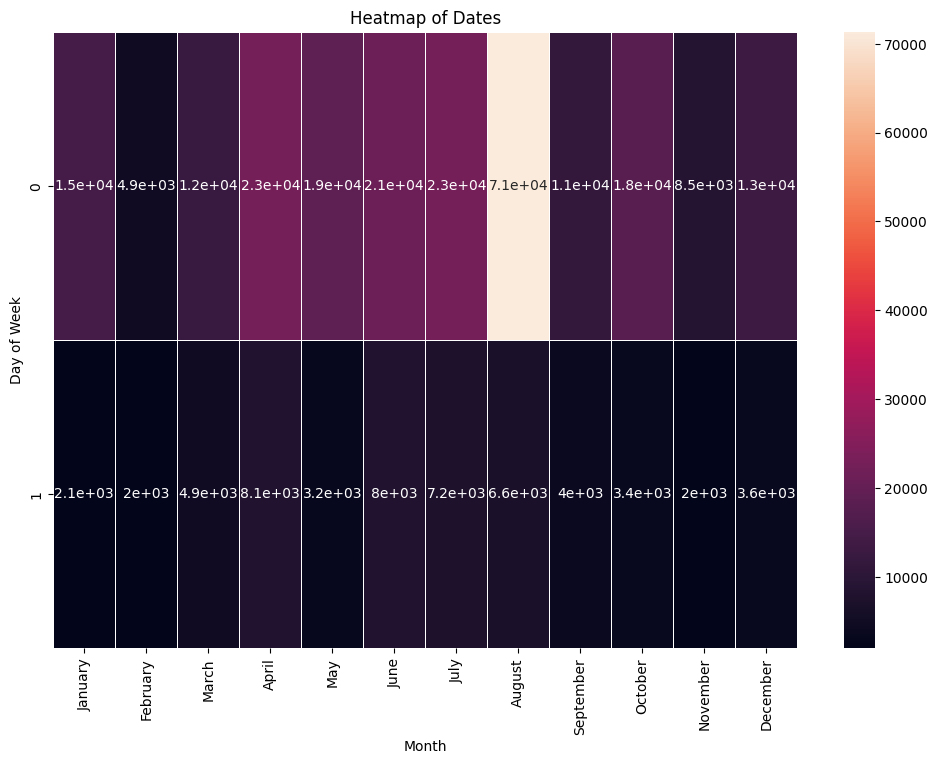

In [35]:
plt.figure(figsize=(10, 5))
heatmap_data = df.pivot_table(index='created_on_is_weekend', columns='created_on_month', aggfunc='size', fill_value=0)
heatmap_data
days_order = [0, 1]
heatmap_data = heatmap_data.reindex(days_order)
months_order = list(range(1, 13))
heatmap_data = heatmap_data[months_order]

heatmap_data.index = [0, 1]
heatmap_data.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cbar=True, linewidth=.5)
plt.title('Heatmap of Dates')
plt.xlabel('Month')
plt.ylabel('Day of Week');